In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing Dataset
data = pd.read_csv("spam.csv",encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [49]:
data['length'] = data['v2'].apply(len)
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

In [50]:
data.head()

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


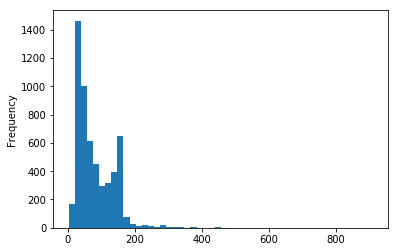

In [56]:
data['length'].plot(bins=50, kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000202C3480160>,
      dtype=object)

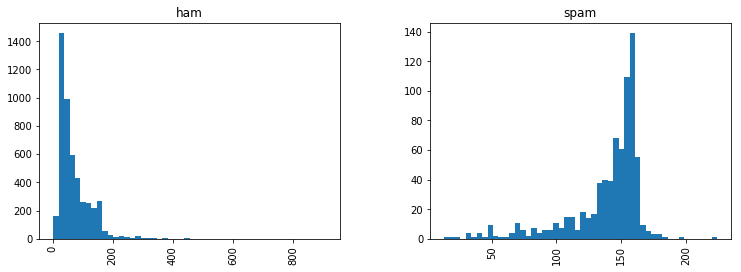

In [59]:
data.hist(column='length', by='v1', bins=50, figsize=(12,4))

In [116]:
X = data['v2']
y = data['v1']

#Converting back to dataframe for applying map function
y = pd.DataFrame(y)

In [108]:
y.head()

,v1
0,ham
1,ham
2,spam
3,ham
4,ham


In [109]:
y['v1'] = y['v1'].apply(lambda x: 0 if x =='ham' else 1)

y.head()

,v1
0,0
1,0
2,1
3,0
4,0


## Text Pre-processing

In [142]:
def process_text(text):
    '''
    Takes in a string of text and returns a processed list of strings
    '''
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    
    return review


In [130]:
X.apply(process_text).head()

0    [Go, jurong, point, crazi, avail, bugi, n, gre...
1                         [Ok, lar, joke, wif, u, oni]
2    [free, entri, wkli, comp, win, FA, cup, final,...
3        [U, dun, say, earli, hor, U, c, alreadi, say]
4      [nah, I, think, goe, usf, live, around, though]
Name: v2, dtype: object

## Splitting data into Training and Test set

In [110]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Data Pipeline

In [128]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=process_text)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [129]:
pipeline.fit(X_train, y_train)

c:\python64_new\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function process_text at 0x00000202D5BDD620>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

## Prediction

In [131]:
y_pred = pipeline.predict(X_test)

In [151]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[949,   0],
       [ 44, 122]], dtype=int64)

In [152]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       949
           1       1.00      0.73      0.85       166

   micro avg       0.96      0.96      0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115



There are quite a few possible metrics for evaluating model performance. Which one is the most important depends on the task and the business effects of decisions based off of the model. For example, the cost of mis-predicting "spam" as "ham" is probably much lower than mis-predicting "ham" as "spam".